<div style="width: 38.5%;">
    <p><strong>City College of San Francisco</strong><p>
    <hr>
    <p>MATH 108 - Foundations of Data Science</p>
</div>

# Lecture 17: Comparing Distributions

Associated Textbook Sections: [11.1, 11.2](https://inferentialthinking.com/chapters/11/2/Multiple_Categories.html)

<h2>Set Up the Notebook<h2>

In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lecture-17:-Comparing-Distributions" data-toc-modified-id="Lecture-17:-Comparing-Distributions-1">Lecture 17: Comparing Distributions</a></span><ul class="toc-item"><li><span><a href="#Set-Up-the-Notebook" data-toc-modified-id="Set-Up-the-Notebook-1.1">Set Up the Notebook</a></span></li><li><span><a href="#" data-toc-modified-id="-1.2"></a></span></li><li><span><a href="#Comparing-Distributions" data-toc-modified-id="Comparing-Distributions-1.3">Comparing Distributions</a></span><ul class="toc-item"><li><span><a href="#Jury-Selection-in-Alameda-County" data-toc-modified-id="Jury-Selection-in-Alameda-County-1.3.1">Jury Selection in Alameda County</a></span></li><li><span><a href="#Jury-Panels" data-toc-modified-id="Jury-Panels-1.3.2">Jury Panels</a></span></li><li><span><a href="#Demo:-Alameda-County-Jury-Panels" data-toc-modified-id="Demo:-Alameda-County-Jury-Panels-1.3.3">Demo: Alameda County Jury Panels</a></span></li></ul></li><li><span><a href="#A-New-Statistic" data-toc-modified-id="A-New-Statistic-1.4">A New Statistic</a></span><ul class="toc-item"><li><span><a href="#Distance-Between-Distributions" data-toc-modified-id="Distance-Between-Distributions-1.4.1">Distance Between Distributions</a></span></li><li><span><a href="#Demo:-Distance-Between-Distributions" data-toc-modified-id="Demo:-Distance-Between-Distributions-1.4.2">Demo: Distance Between Distributions</a></span></li><li><span><a href="#Total-Variation-Distance" data-toc-modified-id="Total-Variation-Distance-1.4.3">Total Variation Distance</a></span></li><li><span><a href="#Demo:-Total-Variation-Distance" data-toc-modified-id="Demo:-Total-Variation-Distance-1.4.4">Demo: Total Variation Distance</a></span></li><li><span><a href="#Summary-of-the-Method" data-toc-modified-id="Summary-of-the-Method-1.4.5">Summary of the Method</a></span></li></ul></li><li><span><a href="#Testing-Hypotheses" data-toc-modified-id="Testing-Hypotheses-1.5">Testing Hypotheses</a></span><ul class="toc-item"><li><span><a href="#Testing-Hypotheses" data-toc-modified-id="Testing-Hypotheses-1.5.1">Testing Hypotheses</a></span></li><li><span><a href="#Null-and-Alternative" data-toc-modified-id="Null-and-Alternative-1.5.2">Null and Alternative</a></span></li><li><span><a href="#Test-Statistic" data-toc-modified-id="Test-Statistic-1.5.3">Test Statistic</a></span></li><li><span><a href="#Prediction-Under-the-Null-Hypothesis" data-toc-modified-id="Prediction-Under-the-Null-Hypothesis-1.5.4">Prediction Under the Null Hypothesis</a></span></li><li><span><a href="#Conclusion-of-the-Test" data-toc-modified-id="Conclusion-of-the-Test-1.5.5">Conclusion of the Test</a></span></li></ul></li></ul></li></ul></div>

## Comparing Distributions

### Jury Selection in Alameda County

<img src="img/ACLU_report.png" width=60%>

Report Source: [ACLU of Northern California - RACIAL AND ETHNIC DISPARITIES IN ALAMEDA COUNTY JURY POOLS (2010)](https://www.aclunc.org/sites/default/files/racial_and_ethnic_disparities_in_alameda_county_jury_pools.pdf)

### Jury Panels

<img src="img/jury_selection_process.png" width = 80%>

Section 197 of California's Code of Civil Procedure says, 
> "All persons selected for jury service shall be selected at random, from a source or sources inclusive of a representative cross section of the population of the area served by the court."

### Demo: Alameda County Jury Panels

Visualize the the eligible and panel distributions of ethnicities based on the Totals in the report.

In [2]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian/PI ', 'Black/AA', 'Hispanic ', 'Caucasian', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury

Ethnicity,Eligible,Panels
Asian/PI,0.15,0.26
Black/AA,0.18,0.08
Hispanic,0.12,0.08
Caucasian,0.54,0.54
Other,0.01,0.04


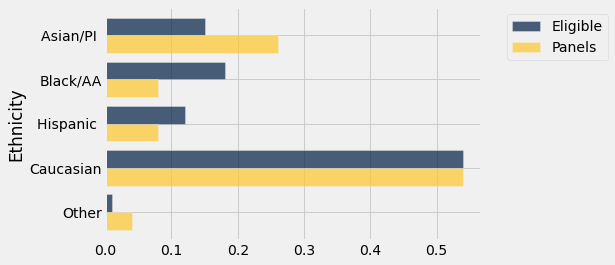

In [3]:
jury.barh('Ethnicity')

Under the model, define an array that represents the distribution of people from which the jurors are randomly sampled

In [4]:
model = make_array(0.15, 0.18, 0.12, 0.54, 0.01)

Simulate a random draw of 1423 jurors from this distribution

In [5]:
simulated = sample_proportions(1423, model)
simulated

array([0.14827829, 0.15811665, 0.11876318, 0.56078707, 0.01405481])

The actual observed distribution (Panels) looks quite different from the simulation -- try simulating this several times to confirm!

In [6]:
jury_with_simulated = jury.with_column('Simulated', simulated)
jury_with_simulated

Ethnicity,Eligible,Panels,Simulated
Asian/PI,0.15,0.26,0.148278
Black/AA,0.18,0.08,0.158117
Hispanic,0.12,0.08,0.118763
Caucasian,0.54,0.54,0.560787
Other,0.01,0.04,0.0140548


Visualize the results of the last simulation.

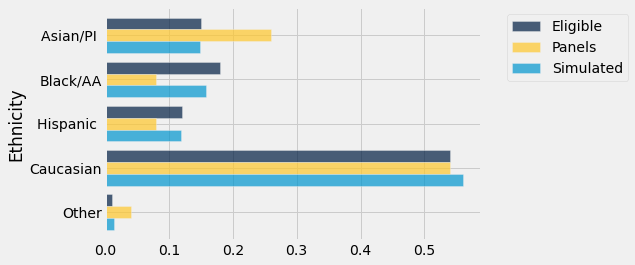

In [7]:
jury_with_simulated.barh('Ethnicity')

## A New Statistic

### Distance Between Distributions

* People on the panels are of multiple ethnicities
* Distribution of ethnicities is categorical
* To see whether the the distribution of ethnicities of the panels is close to that of the eligible jurors, we have to measure the distance between two categorical distributions


### Demo: Distance Between Distributions

In the last lecture, the difference between observed black/purple and their expected values (26%/75%) was our statistic. In this case, we need to understand how each of the 5 categories differ from their expected values according to the model.

In [8]:
diffs = jury.column('Panels') - jury.column('Eligible')
jury_with_difference = jury.with_column('Difference', diffs)
jury_with_difference

Ethnicity,Eligible,Panels,Difference
Asian/PI,0.15,0.26,0.11
Black/AA,0.18,0.08,-0.1
Hispanic,0.12,0.08,-0.04
Caucasian,0.54,0.54,0
Other,0.01,0.04,0.03


### Total Variation Distance

Total Variation Distance (TVD) Recipe:
* For each category, compute the difference in proportions between two distributions
* Take the absolute value of each difference
* Sum, and then divide the sum by 2


### Demo: Total Variation Distance

Define a function that calculates the TVD for two distributions inputed as arrays.

In [9]:
def tvd(dist1, dist2):
    return sum(abs(dist1 - dist2))/2

Calculate the TVD of our observed data (Panels) from their expected values assuming the model is true (Eligbible)

In [10]:
obsvd_tvd = tvd(jury.column('Panels'), jury.column('Eligible'))
obsvd_tvd

0.14

Calculate the TVD of a model simulation from its expected values

In [12]:
tvd(sample_proportions(1423, model), jury.column('Eligible'))

0.027849613492621213

Replicate creating sample juries and calculated the TVD in relation to the model 10000 times. Visualize how the observed statistic fits in the distribution formed from those simulated TVD values.

Observed TVD: 0.14


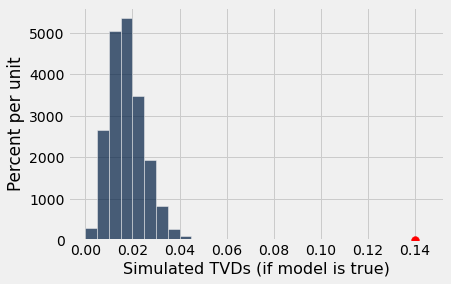

In [14]:
def simulated_tvd():
    return tvd(sample_proportions(1423, model), model)

tvds = make_array()

num_simulations = 10000
for i in np.arange(num_simulations):
    new_tvd = simulated_tvd()
    tvds = np.append(tvds, new_tvd)

title = 'Simulated TVDs (if model is true)'
bins = np.arange(0, .15, .005)

Table().with_column(title, tvds).hist(bins = bins)
plots.scatter(0.14, 0, color='red', s=60, zorder=3)
print('Observed TVD: ' + str(obsvd_tvd))

### Summary of the Method

To assess whether a sample was drawn randomly from a known categorical distribution:
* Use TVD as the statistic because it measures the distance between categorical distributions
* Sample at random from the population and compute the TVD from the random sample; repeat numerous times
* Compare:
    * Empirical distribution of simulated TVDs
    * Actual TVD from the sample in the study


## Testing Hypotheses

### Testing Hypotheses

* A test chooses between two views of how data were generated
* The views are called hypotheses
* The test picks the hypothesis that is better supported by the observed data


### Null and Alternative

The method only works if we can simulate data under one of the hypotheses.
* Null hypothesis:
    * A well defined chance model about how the data were generated
    * We can simulate data under the assumptions of this model – “under the null hypothesis”
* Alternative hypothesis: A different view about the origin of the data


### Test Statistic

* The statistic that we choose to simulate, to decide between the two hypotheses
* Questions before choosing the statistic:
    * What values of the statistic will make us lean towards the null hypothesis?
    * What values will make us lean towards the alternative? Preferably, the answer should be just "high". Try to avoid "both high and low".


### Prediction Under the Null Hypothesis

* Simulate the test statistic under the null hypothesis; draw the histogram of the simulated values
* This displays the **empirical distribution of the statistic under the null hypothesis**
* It is a prediction about the statistic, made by the null hypothesis 
    * It shows all the likely values of the statistic
    * Also how likely they are (**if the null hypothesis is true**)
* The probabilities are approximate, because we can't generate all the possible random samples


### Conclusion of the Test

* Resolve choice between null and alternative hypotheses
    * Compare the **observed test statistic** and its empirical distribution under the null hypothesis
    * If the observed value is **not consistent** with the distribution, then the test favors the alternative ("data is more consistent with the alternative")
* Whether a value is consistent with a distribution:
    * A visualization may be sufficient
    * If not, there are conventions about "consistency"

<footer>
    <hr>
    <p>Adopted from UC Berkeley DATA 8 course materials.</p>
    <p>This content is offered under a <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">CC Attribution Non-Commercial Share Alike</a> license.</p>
</footer>